# Solar Power

## Business Understanding

### Stakeholder:
- 
-
-

### True Business Problem:
With a recent push for cleaner renewable energy (company name) is seeing an increase in solar panel request. (company name) is looking the potential of solar power and how it can meet the demands of the current power consumption. 

# Data Understanding

In [1]:
# imports
import pandas as pd
import numpy as np
import requests 

from datetime import datetime as dt
from secret import keys
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Data was pulled from `https://www.eia.gov/opendata/index.php`
- In previous notebooks it was shown that I pulled in the data and created a master dataframe. From there I pulled the data down to my `data` folder within my `projects` and will use that as the source of my data.
- I originally used `parameters` to pull in the data from the website, which were:
    - `'api_key': api_key`,
    - `"frequency": "hourly"`, is pulling data in hourly.
    - `"data[]": "value"`, is the amount of energy produced
    - `"facets[fueltype][]":["SUN", "NG", "OIL"]`, energy source 
    - `"facets[respondent][]": "SOCO"`, recording location of data (Southern Company)
    - `"start": "2021-07-01"`, Time frame to pull data (start and end date)
    - `"end": "2022-07-29"`,
    - `"offset"`: 0
- Next, I assigned the data to list, requested the response from the website while using the above `parameters`, and assigned it to a dataframe.
    - dfs = []
    - for off in range(0, 30000, 5000):
        - params["offset"] = off
        - resp = requests.get(base_url, params=params)
        - data = resp.json()
        - df = pd.DataFrame(data['response']['data'])
        - dfs.append(df)
- Finally, I assigned the index, picked the columns that would be kept, and the target column `value`
    - df2 = pd.pivot(data=pd.concat(dfs), index='period', columns='fueltype', values='value')
    

In [40]:
df = pd.read_csv('../data/df2.csv')
df.head()

,period,NG,OIL,SUN
0,2021-07-01 00:00:00,20540,-1,177
1,2021-07-01 01:00:00,19923,0,32
2,2021-07-01 02:00:00,18983,0,0
3,2021-07-01 03:00:00,17476,-1,0
4,2021-07-01 04:00:00,15457,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   period  9432 non-null   object
 1   NG      9432 non-null   int64 
 2   OIL     9432 non-null   int64 
 3   SUN     9432 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 294.9+ KB


Below, a `datetime` will be created and will be assigned as the `index`

In [42]:
df['period'] = pd.to_datetime(df['period'])

In [43]:
df = df.set_index('period')
df = df.resample('D').sum()
df.head()

,NG,OIL,SUN
period,,,
2021-07-01,393574,-12,16579
2021-07-02,370842,-10,11408
2021-07-03,331165,-15,18091
2021-07-04,312014,-15,20093
2021-07-05,350574,8,15702


Create separate dataframes for the target columns

In [50]:
df_gas = df['NG']

In [51]:
df_oil = df['OIL']

In [52]:
df_sun = df['SUN']

# Arima

In [53]:
# Decompose Import
from statsmodels.tsa.seasonal import seasonal_decompose

## Gas

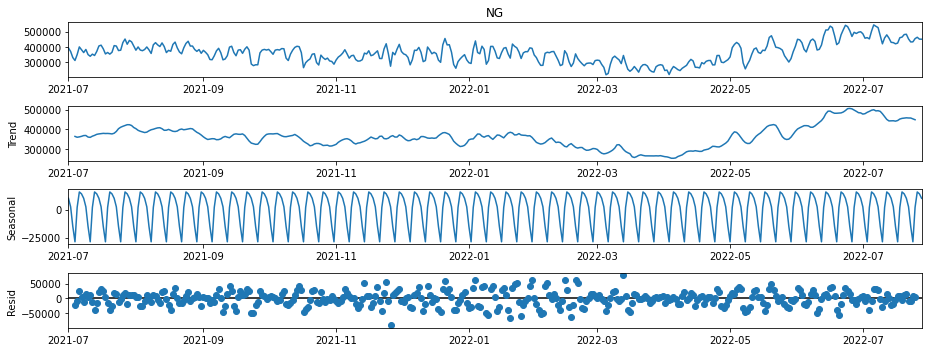

In [54]:
decomp = seasonal_decompose(df_gas)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [68]:
train_gas, test_gas = train_test_split(df_gas, test_size = 56, shuffle=False)

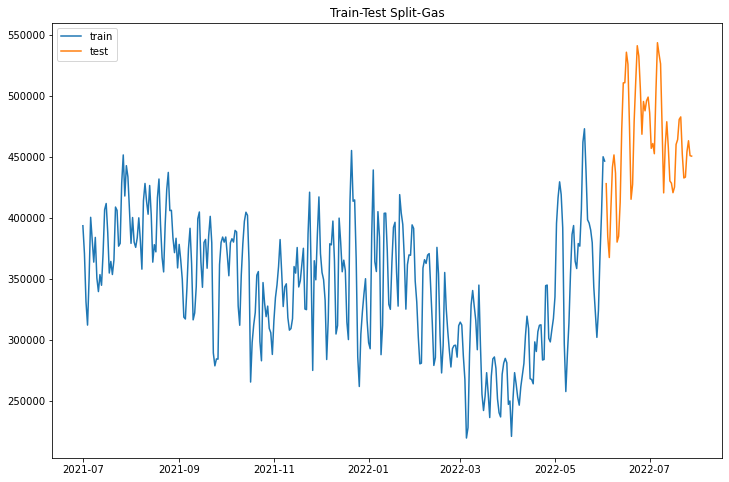

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_gas, label='train')
ax.plot(test_gas, label='test')
ax.set_title('Train-Test Split-Gas');
plt.legend();

## Oil

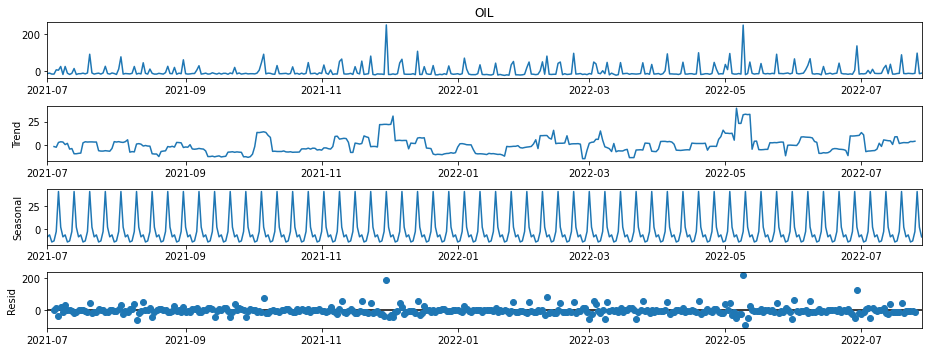

In [57]:
decomp = seasonal_decompose(df_oil)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [66]:
train_oil, test_oil = train_test_split(df_oil, test_size = 56, shuffle=False)

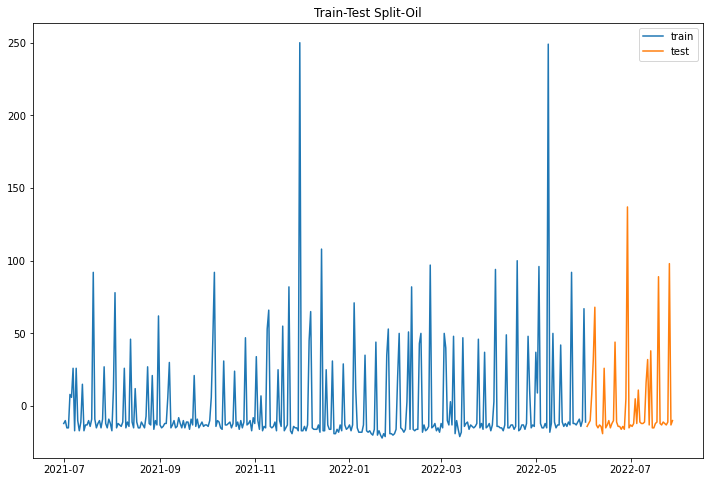

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oil, label='train')
ax.plot(test_oil, label='test')
ax.set_title('Train-Test Split-Oil');
plt.legend();

## Sun

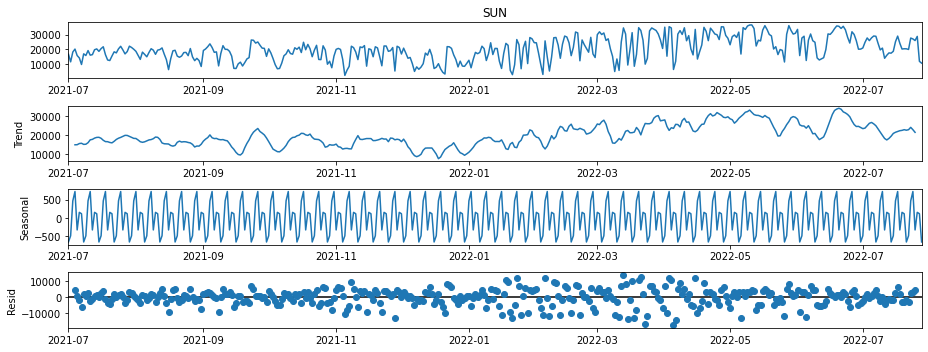

In [60]:
decomp = seasonal_decompose(df_sun)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [64]:
train_sun, test_sun = train_test_split(df_sun, test_size = 56, shuffle=False)

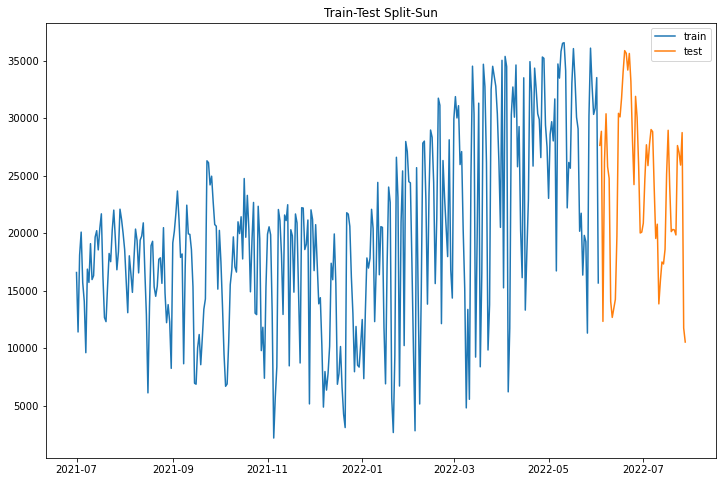

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_sun, label='train')
ax.plot(test_sun, label='test')
ax.set_title('Train-Test Split-Sun');
plt.legend();

# PMDArima

In [70]:
# Import ARIMA
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose, auto_arima
from pmdarima.arima.stationarity import ADFTest

## Gas

In [96]:
# Checking stationarity
adf_test_gas = ADFTest()

adf_test_gas = ADFTest(alpha=0.05)
p_val_gas, should_diff_gas = adf_test.should_diff(df_gas) 

print(f"P-Value: {p_val_gas}, so should you difference the data? {should_diff_gas}")

P-Value: 0.5482058552941115, so should you difference the data? True


In [97]:
arima = auto_arima(train_gas,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=7873.830, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7942.285, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7930.688, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7925.885, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7940.295, Time=0.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=7872.433, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=7876.104, Time=0.17 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=7873.627, Time=1.11 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=7872.980, Time=0.34 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=7875.625, Time=2.38 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=7886.997, Time=0.30 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7916.623, Time=0.42 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=7873.600, Time=0.66 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=7873.304, Time=0.89 sec
 ARIMA(0,1,3)(0,0,1

In [98]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  337
Model:             SARIMAX(2, 1, 3)x(0, 0, [1], 12)   Log Likelihood               -3924.760
Date:                              Wed, 03 Aug 2022   AIC                           7863.520
Time:                                      15:21:14   BIC                           7890.239
Sample:                                           0   HQIC                          7874.171
                                              - 337                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4681      0.052     28.311      0.000       1.366       1.570
ar.L2         -0.5459      0.051    -10.620      0.000      -0.647      -0.445
ma.L1         -1.5265      0.047    -32.296      0.000      -1.619      -1.434
ma.L2          0.2267      0.078      2.915      0.004       0.074       0.379
ma.L3          0.3455      0.039      8.749      0.000       0.268       0.423
ma.S.L12      -0.1578      0.046     -3.444      0.001      -0.248      -0.068
sigma2      8.111e+08   6.52e-12   1.24e+20      0.000    8.11e+08    8.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.08   Jarque-Bera (JB):                 8.57
Prob(Q):                              0.08   Prob(JB):                         0.01
Heteroskedasticity (H):               0.78   Skew:                             0.26
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.44e+37. Standard errors may be unstable.
"""

In [100]:
test_preds_gas = pd.Series(arima.predict(n_periods=len(test_gas)), index=test_gas.index)

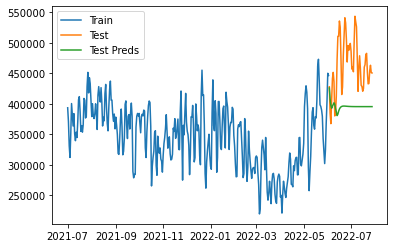

In [101]:
plt.plot(train_gas, label = 'Train')
plt.plot(test_gas, label = 'Test')
plt.plot(test_preds_gas, label = 'Test Preds')
plt.legend();

In [102]:
# Fit the best fit model from grid search SARIMAX(2, 1, 3)x(0, 0, 1, 12)
seas_arima_gas = ARIMA(train_gas,
                   order=(2, 1, 3),
                   seasonal_order=(0, 0, 1, 12))
res_sarima_gas = seas_arima_gas.fit()

# Print out summary information on the fit
print(res_sarima_gas.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 NG   No. Observations:                  337
Model:             ARIMA(2, 1, 3)x(0, 0, [1], 12)   Log Likelihood               -3924.760
Date:                            Wed, 03 Aug 2022   AIC                           7863.520
Time:                                    15:23:35   BIC                           7890.239
Sample:                                07-01-2021   HQIC                          7874.171
                                     - 06-02-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4681      0.052     28.311      0.000       1.366       1.570
ar.L2         -0.5459      0.051   

### FBProphet Gas

In [119]:
from prophet import Prophet

In [131]:
Model_gas = Prophet(interval_width = 0.95)

In [132]:
train_gas_pr = train_gas.reset_index()
train_gas_pr
# resetting the index for the train_gas dataframe

,period,NG
0,2021-07-01,393574
1,2021-07-02,370842
2,2021-07-03,331165
3,2021-07-04,312014
4,2021-07-05,350574
...,...,...
332,2022-05-29,324109
333,2022-05-30,368909
334,2022-05-31,404136
335,2022-06-01,450210


In [133]:
train_gas_pr = train_gas_pr.rename(columns = {'period': 'ds', 'NG': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

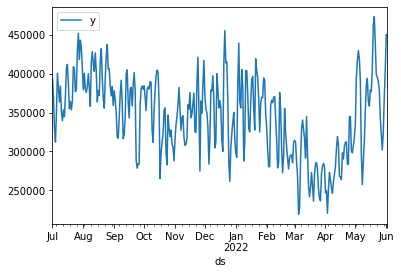

In [134]:
train_gas_pr.plot(y = 'y', x = 'ds')

In [135]:
Model_gas.fit(train_gas_pr)

16:31:18 - cmdstanpy - INFO - Chain [1] start processing
16:31:21 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
# Use a weekly freqency and periods of 8 (two months)
future_gas = Model_gas.make_future_dataframe(periods = 56, freq = 'D')

In [142]:
#Predict the future dates and values
results_gas = Model_gas.predict(df = future_gas)

results_gas.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,406401.155447,297245.240523,460760.391060,394940.046680,419707.503519,-27328.456862,-27328.456862,-27328.456862,-27328.456862,-27328.456862,-27328.456862,0.0,0.0,0.0,379072.698585
389,2022-07-25,407259.319714,333436.894069,486090.612628,395490.954708,420878.265985,3939.542689,3939.542689,3939.542689,3939.542689,3939.542689,3939.542689,0.0,0.0,0.0,411198.862403
390,2022-07-26,408117.483980,344948.876745,501664.443084,396045.364676,422063.099500,16083.719497,16083.719497,16083.719497,16083.719497,16083.719497,16083.719497,0.0,0.0,0.0,424201.203478
391,2022-07-27,408975.648247,347396.394164,494882.289303,396497.568880,423260.475273,12662.450150,12662.450150,12662.450150,12662.450150,12662.450150,12662.450150,0.0,0.0,0.0,421638.098396
392,2022-07-28,409833.812513,336281.513750,495235.156560,397067.866991,424495.052555,8328.966410,8328.966410,8328.966410,8328.966410,8328.966410,8328.966410,0.0,0.0,0.0,418162.778923


In [143]:
results_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,397593.332490,321786.411854,471100.524114
1,2021-07-02,390070.892959,312928.948967,469411.302835
2,2021-07-03,373937.565745,300381.981105,455913.396486
3,2021-07-04,361101.857646,278365.221034,440836.086410
4,2021-07-05,392091.840007,319777.645351,469751.897586
...,...,...,...,...
388,2022-07-24,379072.698585,297245.240523,460760.391060
389,2022-07-25,411198.862403,333436.894069,486090.612628
390,2022-07-26,424201.203478,344948.876745,501664.443084
391,2022-07-27,421638.098396,347396.394164,494882.289303


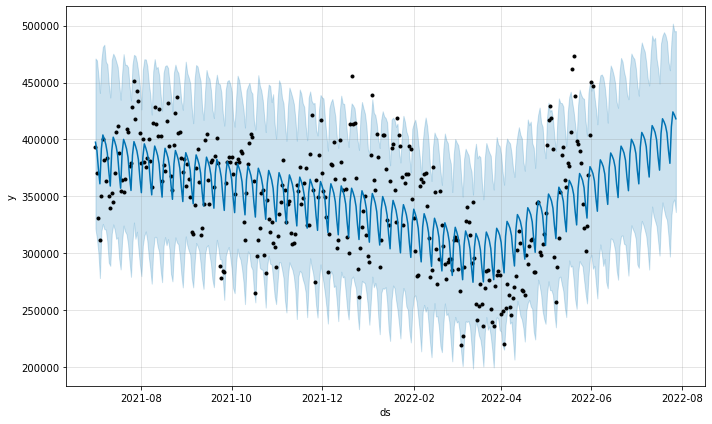

In [144]:
# plot the predictions
Model_gas.plot(results_gas);

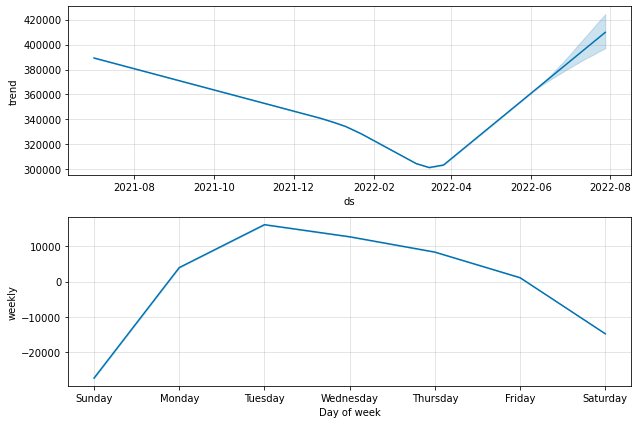

In [145]:
# Plot model components
Model_gas.plot_components(results_gas);

## Oil

In [103]:
adf_test_oil = ADFTest()

adf_test_oil = ADFTest(alpha=0.05)
p_val_oil, should_diff_oil = adf_test.should_diff(df_oil) 

print(f"P-Value: {p_val_oil}, so should you difference the data? {should_diff_oil}")

P-Value: 0.01, so should you difference the data? False


In [104]:
arima_oil = auto_arima(train_oil,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3311.612, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3313.008, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3312.228, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3309.736, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=3311.973, Time=0.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=3311.544, Time=0.19 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=3310.760, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3312.732, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3312.413, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3305.933, Time=0.31 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3307.017, Time=1.05 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3306.769, Time=0.89 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3306.300, Time=1.73 sec
 ARIMA(2,0,1)(0,0,0)[12]

In [105]:
arima_oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1624.704
Date:                Wed, 03 Aug 2022   AIC                           3261.407
Time:                        15:24:08   BIC                           3284.328
Sample:                             0   HQIC                          3270.543
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0665      0.083     12.863      0.000       0.904       1.229
ar.L2         -0.7761      0.102     -7.590      0.000      -0.976      -0.576
ar.L3         -0.1788      0.082     -2.182      0.029      -0.339      -0.018
ma.L1         -1.2336      0.021    -59.380      0.000      -1.274      -1.193
ma.L2          0.9793      0.021     45.921      0.000       0.938       1.021
sigma2       902.0073     28.979     31.126      0.000     845.209     958.806
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              7979.34
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                             3.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
test_preds_oil = pd.Series(arima_oil.predict(n_periods=len(test_oil)), index=test_oil.index)

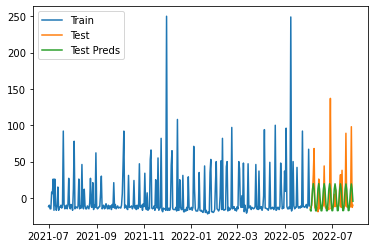

In [107]:
plt.plot(train_oil, label = 'Train')
plt.plot(test_oil, label = 'Test')
plt.plot(test_preds_oil, label = 'Test Preds')
plt.legend();

In [108]:
# Fit the best fit model from grid search SARIMAX(3, 0, 2)(0, 0, 0, 12)
seas_arima_oil = ARIMA(train_oil,
                   order=(3, 0, 2),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_oil = seas_arima_oil.fit()

# Print out summary information on the fit
print(res_sarima_oil.summary())

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    OIL   No. Observations:                  337
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1624.629
Date:                Wed, 03 Aug 2022   AIC                           3263.258
Time:                        15:24:10   BIC                           3289.999
Sample:                    07-01-2021   HQIC                          3273.917
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7095      2.417     -0.294      0.769      -5.446       4.027
ar.L1          1.0732      0.083     12.903      0.000       0.910       1.236
ar.L2         -0.7844      0.103     -7.638      0.0

C:\Users\FFF\anaconda3\envs\time\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### FBProphet Oil

## Sun

In [109]:
adf_test_sun = ADFTest()

adf_test_sun = ADFTest(alpha=0.05)
p_val_sun, should_diff_sun = adf_test.should_diff(df_sun) 

print(f"P-Value: {p_val_sun}, so should you difference the data? {should_diff_sun}")

P-Value: 0.01, so should you difference the data? False


In [110]:
arima_sun = auto_arima(train_sun,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=6831.428, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6936.989, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6923.754, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6878.858, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6934.991, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=6829.723, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=6828.490, Time=0.40 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=6829.754, Time=1.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=6826.578, Time=0.28 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=6827.860, Time=0.67 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=6827.830, Time=0.77 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=6829.546, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6875.465, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=6827.976, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0

In [112]:
arima_sun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -3410.130
Date:                Wed, 03 Aug 2022   AIC                           6826.259
Time:                        15:24:56   BIC                           6837.711
Sample:                             0   HQIC                          6830.824
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5119      0.050    -10.279      0.000      -0.610      -0.414
ma.L2         -0.4027      0.046     -8.700      0.000      -0.493      -0.312
sigma2      4.225e+07      4e-10   1.06e+17      0.000    4.22e+07    4.22e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.47
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               4.04   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+33. Standard errors may be unstable.
"""

In [113]:
test_preds_sun = pd.Series(arima_sun.predict(n_periods=len(test_sun)), index=test_sun.index)

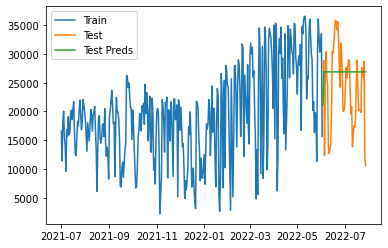

In [114]:
plt.plot(train_sun, label = 'Train')
plt.plot(test_sun, label = 'Test')
plt.plot(test_preds_sun, label = 'Test Preds')
plt.legend();

In [115]:
# Fit the best fit model from grid search SARIMAX(0, 1, 2)x(0, 0, 0, 12)
seas_arima_sun = ARIMA(train_sun,
                   order=(0, 1, 2),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_sun = seas_arima_sun.fit()

# Print out summary information on the fit
print(res_sarima_sun.summary())

                               SARIMAX Results                                
Dep. Variable:                    SUN   No. Observations:                  337
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -3410.130
Date:                Wed, 03 Aug 2022   AIC                           6826.259
Time:                        15:25:01   BIC                           6837.711
Sample:                    07-01-2021   HQIC                          6830.824
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5119      0.050    -10.279      0.000      -0.610      -0.414
ma.L2         -0.4027      0.046     -8.700      0.000      -0.493      -0.312
sigma2      4.225e+07      4e-10   1.06e+17      0.0

### FBProphet Sun